# MATH5271 Environmental Data Science and Statistics



## Week 4: Time Series II - Frequency Domain

### Welcome to Week 4 of MATH5271. In this session we will explore time series analysis using frequency domain methods. By the end of this session you should understand:

- How to fit individual harmonics to a time series;
- How to represent an entire time series as a sum of harmonic functions and interpret periodograms;
- Use ideas related to the Nyquist frequency to understand aliased signals and
- Various applications of frequency domain approaches in Environemntal Data Sciences.


## 1. Setup and Load Data

Before we get started analysing some data we need to ensure we have the appropriate 'libraries' installed. You can think of these as opening a box of available tools. The .csv files we upload will be uploaded into a 'pandas' data frame. We will use the 'numpy' (numerical python) packkage to do some basic maths with the data and Matplotlib's 'pyplot' package to make some pretty graphs. There are many other packages and libraries avaialble freely in python. We will experiment with a few in this course but will only really scratch the surface. I will try to keep things as simple as possible so we can focus on understanding - rather than trouble shooting technical issues.

In [286]:
# import libraries
import pandas as pd

# Numerics
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# plot figures in Colaboratory notebook
%matplotlib inline

I have copied the data table 9.6 from Wilks into a csv file and am storing these on github.

We will load the data table as a pandas 'DataFrame'. This is a 2-dimensional data structure that can store data of different types and has inbuilt operations (like calcualting statistics and doing basic plots). 

In [287]:
# Define the URL where the data set is stored
df_url = 'https://raw.githubusercontent.com/janzika/MATH5271/main/Wilks_Table8.6.csv' 

# Import the data set as a Pandas Dataframe using the 'read_csv' function
df = pd.read_csv(df_url)

# Let's look at all the data
pd.set_option('display.max_rows', 100) # Without this it will only show a few rows
display(df)

,Month,Year,Temp_Far,Location
0,1,1987,21.4,Ithaca
1,2,1987,17.9,Ithaca
2,3,1987,35.9,Ithaca
3,4,1987,47.7,Ithaca
4,5,1987,56.4,Ithaca
5,6,1987,66.3,Ithaca
6,7,1987,70.9,Ithaca
7,8,1987,65.8,Ithaca
8,9,1987,60.1,Ithaca
9,10,1987,45.4,Ithaca


## Time domain vs frequency domain (Wilks)

### Time domain
“Time-domain methods seek to characterize data series in the same terms in which they are observed and reported. A primary tool for characterization of relationships between data values in the time-domain approach is the autocorrelation function.“

### Frequency domain
“Frequency-domain analysis represents data series in terms of contributions occurring at different time scales, or characteristic frequencies. Each time scale is represented by a pair of sine and cosine functions.”

## Frequency domain: Practical motivation

- Identify cycles in data (potetially linked to interesting processes)
- May want to remove (filter) certain cycles in order to extract underlying information (e.g. long term trend).
- Frequency domain analysis ‘better’ (we’ll see why) than simply removing averages on certain time scales.

## Frequency domain: Physical Motivations

Oscillations appear in nature as a consequence of physical laws. Consider a simple undamped oscillator :

$$\frac{d^2x}{dt^2}  + c^2x = 0;\,\, x(0)=A; \,\, \frac{dx}{dt}(0)=0$$

where $x$ is displacement and $c$ is a constant. This has the solution 

$$ x(t)=A\cos(ct).$$

Also, many natural systems are subjected to oscillating ‘forcing’ processes.
    


## What examples can you think of where

- Systems in nature generate harmonic cycles internally (i.e. like an oscillator)?
- Systems in nature are affected by harmonic forcing?

In what variables would we see evidence of such cycles?

## Examples of internally  oscillations

- Sound (pressure waves);
- Gravity, Planetary (Rossby, Kelvin etc.);
- Bird song;
- Sweying of trees.

## Examples of forced oscillations

- Diurnal and seasonal cycles (sun and earth's orbit);
- Solar and Milankovitch cycles;
- Weakly and seasonal cycles of aerosol polution;
- Sound polution.

## Fitting harmonics

Let’s say we have some data $y_t$ where $t$ is a time increment, and  we want to fit a single cosine function of known frequency ($2\pi k/n$, where $n$ is length of the timeseires and $k$ is the number of complete cycles) but unknown phase ($\phi_1$) and amplitude $C_1$. Here our model is

$$y_t= \overline{y} + C_1 \cos⁡ \left( \frac{2\pi k}{n} t + \phi_1 \right).$$

Using the identity $\cos(\alpha+\phi) = \cos(\alpha)\cos(\phi_1)+ \sin(\alpha)\sin(\phi_1)$ we find that

$$y_t= \overline{y} + A_1 \cos⁡\left( \frac{2\pi k}{n} t \right) + B_1 \sin \left( \frac{2\pi k}{n} t \right).$$

with

$$C_1^2 = A_1^2+B_1^2. $$

How might we solve for $A_1$ and $B_1$?



Text(0, 0.5, 'Amplitude')

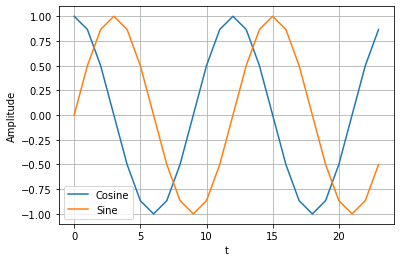

In [288]:
# Plot some cosine and sine functions
n = 24 #length of data set in months
t = np.arange(0,n) #time dimension
k = 2 #number of cycles (period = 12)
# Use numpy to define cosine and sine
cosfnc = np.cos(2*np.pi*t*k/n)
sinfnc = np.sin(2*np.pi*t*k/n)
plt.plot(cosfnc,label ='Cosine')
plt.plot(sinfnc,label ='Sine')
plt.grid(); plt.legend()
plt.xlabel('t');plt.ylabel('Amplitude')

If we want to fit just a single harmonic, then an obvious approach is linear regression where we find $A_k$ and $B_k$ such 

$$ y_t - \overline{y} = A_k \cos\left(\frac{2\pi t k}{n}\right) + B_k \sin\left(\frac{2\pi t k}{n}\right) + \epsilon_t $$

and the root mean square of the error term ($\sum \epsilon_t^2$) is minimised. 

In order to exploit powerful linear algebra methods we can cast the above problem into matrix form such that 

$$ X \bf{b} = \bf{y} - \bf{E} $$

where $X$ is a 2 x $n$ matrix containing the cosine and sine functions, $\bf{b} = [A_k,B_k]$. 

Let's try this and minimise the error using numpy's linear algebra, least squares function.



-23.739767027193725 -2.1638511734738537


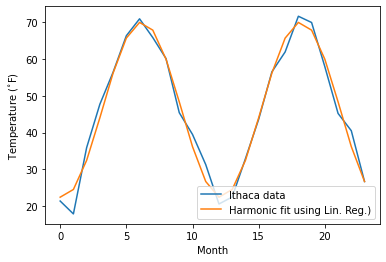

In [289]:
# Define A and y such that Ax = y
X = np.array([cosfnc,sinfnc]).transpose()
y = df.Temp_Far-df.Temp_Far.mean()
# Solve x = inv(A)*y
b_reg = np.linalg.lstsq(X, y,rcond=-1) #(rcond=1 supresses error msg.)
A2lr = b_reg[0][0]; B2lr = b_reg[0][1]; 
y_harmonic = df.Temp_Far.mean() + A2lr*cosfnc+B2lr*sinfnc
# Plot
plt.plot(t,df.Temp_Far,label ='Ithaca data')
plt.plot(t,y_harmonic,label ='Harmonic fit using Lin. Reg.)')
plt.ylabel('Temperature ($^{\circ}$F)'); plt.xlabel('Month'); plt.legend()
print(A2lr,B2lr)

### Summation formula

Linear regression is actually not necassary in this case. We can compute coefficients for any period ($k$ up to $n/2$) simply using the following summation formulae

$$ A_k = \frac{2}{n}\sum_{t=1}^{n}y_n\cos\left(\frac{2\pi t k}{n}\right)$$

and
$$ B_k = \frac{2}{n}\sum_{t=1}^{n}y_n\sin\left(\frac{2\pi t k}{n}\right).$$

Let's try this.


In [290]:
#Compute coefficients using summation formulae
A2 = (2/n)*np.sum(y*cosfnc)
B2 = (2/n)*np.sum(y*sinfnc)
#print and compare to least squares case (lr)
print(A2,B2)
print(A2lr,B2lr)

-23.739767027193714 -2.163851173473855
-23.739767027193725 -2.1638511734738537


### Why do the summation formulae work?

The trigonometric functions \{$\cos(\frac{2\pi t k}{n}),\sin(\frac{2\pi t k}{n})$\} form a complete orthoginal basis for the possible time series of length $n$. Integrating (summing) the basis functions multiplied by the data $y_t$ determines the projection of the data onto the basis functions.

The summation (integral) is called an 'inner product'. Taking the inner product of data with trig functions is equivalent to calculating the 'dot product' of a vector with basis vectors. E.g. for a vector in 3D ${\bf u} = [u,v,w]$ and basis vectors $\{{\bf i},{\bf j},{\bf k}\}$ we have

$$ {\bf u} \cdot {\bf i} = [u,0,0];\\
{\bf u} \cdot {\bf j} = [0,v,0]; \\
{\bf u} \cdot {\bf k} = [0,0,w].$$ 

We can think of the coefficients $A_k$ and $B_k$ as describing how much the data projects onto each harmonic.

# Fourier Transform

In general, we can represent any data with the set of harmonics from $k=1$ to $k=n/2$ such that

$$ y_t = \overline{y} + \sum^{n/2}_{k=1} \left[ A_k\cos(\frac{2\pi t k}{n}) +B_k\sin(\frac{2\pi t k}{n})\right].
$$

The maginute of the data at each frequency $f_k = k/n$ and period $\tau_k = n/k$ is given by 

$$ C_k = \left[ A_k^2+ B_k^2 \right]^{1/2}. $$

This projection of the data into the frequency domain is called the 'Fourier Transform'.

Let's write a function to calculate the coefficients for any period.

In [291]:
# Define function with data (y) and harmonic (k) as inputs, A and B as outputs
def fourtrans(y,k): # y = data, k = harmonic
  n = y.shape[0]
  A_k=(2/n)*np.sum(y.values*np.cos(2*np.pi*k*np.arange(0,n)/n))
  B_k=(2/n)*np.sum(y.values*np.sin(2*np.pi*k*np.arange(0,n)/n))
  return (A_k, B_k)
# Test for kth harmonic
k=1
[A,B] = fourtrans(y,k)
print([A,B])
C = np.sqrt(A**2+B**2)
print(C)

[-0.06789480472689391, 0.4540825212446838]
0.459130308963405


##  Fast Fourier Transform
We can diagnose the same thing using a Fast Fourier Transform algorithm. These are ubiquitous across mathemtaical and statistical software packages. There are inbuilt packages in numpy for example.

The fast fourier transform actually computes complex coefficients ($H_k$) where

$$ H_k = \frac{2}{n}\sum_{i=1}^{n}y_n\exp^{-i\left(\frac{2\pi  k}{n}\right)} = (A_k+iB_k)$$

and $i$ is the imaginary unit with $\sqrt{i} = -1$. 

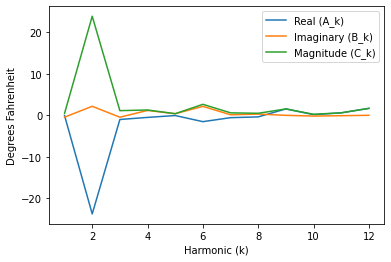

In [292]:
## Use FFT to compute H_k and plot resulting 
Hk = np.fft.rfft(y,n)/(n/2)
# Plot each componenent and magnitude
plt.plot(np.arange(1,Hk.shape[0]),Hk.real[1:(int(n/2)+1)],label='Real (A_k)')
plt.plot(np.arange(1,Hk.shape[0]),Hk.imag[1:(int(n/2)+1)],label='Imaginary (B_k)')
plt.plot(np.arange(1,Hk.shape[0]),abs(Hk[1:int(n/2)+1]),label='Magnitude (C_k)')
plt.xlabel('Harmonic (k)');plt.ylabel('Degrees Fahrenheit');plt.legend()

##  Periodogram


The contribution of a single harmonic to the total variance is given by the common $R^2$ statistic such that

$$ R_k^2  = \frac{(n/2) C_k^2}{(n-1)s_y}.$$

A neat property of the fourier transform is that the information provided by each harmonic is independent. This means the the variances add together linearly therefore the $R^2$ value for any sum of harmonics is simply

$$ R^2  = \sum R_k^2 $$

which is exactly 1 if all harmonics from $k=1$ to $k=n/2$ are considered. This means $R_k^2$ represents a normalised contribution of each harmonic to the variance and it's graph is called the periodogram.

Text(0.5, 0, 'Period, $\tau_k$ (months)')

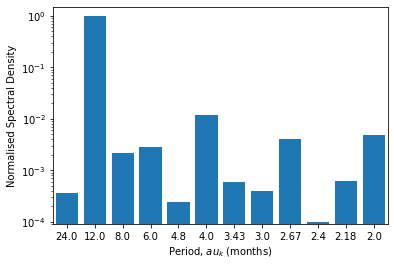

In [293]:
# Calculate variance
sy2 = y.var()
# Magnitude of kth harmonic
C_k = abs(Hk[1:(int(n/2)+1)])
# Plot 'bar graph'
plt.bar(np.arange(1,int(n/2)+1),(n*C_k**2/(2*(n-1)*sy)))
plt.yscale('log')
plt.xticks(np.arange(1,(int(n/2)+1)),np.round(n/np.arange(1,(int(n/2)+1)),2))
plt.axis([0.5,12.5,0.00009,1.5])
plt.ylabel('Normalised Spectral Density')
plt.xlabel('Period, $\tau_k$ (months)')


## Applications

There are numerous applications of frequency domain analysis in environmental data science.

With frequency domain analysis one can isolate at what time scales variability is occuring and therefore identify physical processes. We will discuss sea level (tide) data in the lab session for example. 

Frequency domain analysis allows for the filtering of high or low frequency variability via an inverse foureir transform. Here the foureir transform is carried out to compute $H_k$ for all $k$, then specific harmonics are removed (for example all $H_k$ for for k above some number) and a filtered time series is computed from the remaining harmonics alone.







## Aliasing

What do you think is happening in this [video](https://www.youtube.com/watch?v=TX4U9QRbviA)?

![NINOForecast.png](https://raw.githubusercontent.com/janzika/MATH5271/main/Lecture%204/BirdAlias.png)



## Aliasing

If there is an underlying signal with a frequency $f$ but we make observations at a frequency less than $f$ we may see apparent signals at other frequencies.

Consider a process with a frequency $f$ = 4/5s$^{-1}$ (i.e. period 5/4s). If we measure this process every 5/4 seconds (i.e. with a frequency of 4/5s$^{-1}$) the process will appear constant (like the birds wings). 

If we observe the system every second we will see an apparent cycle with period 5. 

Text(0, 0.5, 'Amplitude')

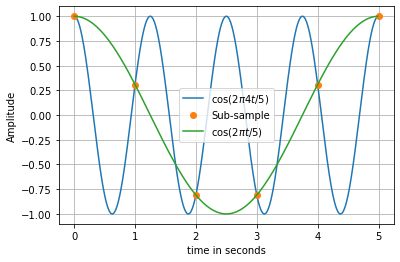

In [294]:
# Demonstrate Aliasing
n = 5 #length of data set in seconds
t = np.arange(0,n,0.01) #time dimension 
t_obs = np.arange(0,6,1) #time of observations
# Use numpy to define cosine and sine
cosfnc = np.cos(2*np.pi*t*4/n)
cosfnc_subsample = np.cos(2*np.pi*t_obs*4/n)
cosfnc_aliased = np.cos(2*np.pi*t/n)
plt.plot(t,cosfnc,label ='$\cos(2\pi 4t/5)$')
plt.plot(t_obs,cosfnc_subsample,'o',label ='Sub-sample')
plt.plot(t,cosfnc_aliased,label ='$\cos(2\pi t/5)$')
plt.grid(); plt.legend()
plt.xlabel('time in seconds');plt.ylabel('Amplitude')

## Nyquist Frequency

The above effect is called aliasing. All the variance is preserved in the fourier transformation. So 'power' in the unsampled higher frequencies will shift to the lower frequencies which are sampled, even if nothing is 'happening' at those frequencies. 

As you will have seen, we only consider frequencies up to 1/2 (i.e. cycles which repeat every 2 time increments). Effectively we need at least two measurments per cycle to determine the two coefficients $A_k$ and $B_k$. This is known as the Nyquist frequency. 

## Nyquist  and Aliasing

Any signal which has a higher frequency than Nyquist ($f>\frac{1}{2}$) will move to an aliased frequency ($f_A$) according to the following formula

$$f_A = j \pm f$$

where $j$ is some integer (positive or nagative). Note here that the unit of time is the time between observations. 

So, if measurements are made every second (1Hz), a process that oscillates less frequently than once per 2 seconds will appear in the periodogram as a process with a lower frequency of $j^+ - f$ where $j^+$ is a positive integer or $f - j^-$ where $j^-$ is a negative integer.

Text(0.5, 0, 'Frequency f (e.g. in s$^{-1}$)')

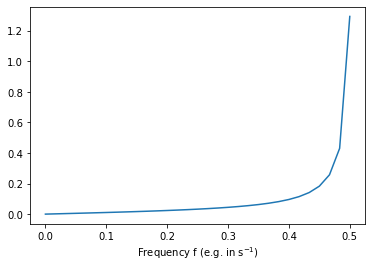

In [301]:
n = 60 #length of data set (e.g. in seconds)
t_obs = np.arange(0,n,1) #time of observations
f=150/n # Aliased if bigger than 1/2 (e.g. once every 2 sec)
cosfnc_subsample = np.cos(2*np.pi*t_obs*f)
Hk = np.fft.rfft(cosfnc_subsample,n+1)/(n/2)
C_k = abs(Hk[0:(int(n/2)+1)])
plt.plot(np.arange(0,int(n/2)+1)/n,C_k)
plt.xlabel('Frequency f (e.g. in s$^{-1}$)')

### Aliasing can lead to very troublesome interpretations of sparse observations.
![DayAftTom.png](https://github.com/janzika/MATH5271/raw/main/Lecture%204/DayAftTom.png)


### A number of extensions to harmonic analysis exist for example 'Wavelets' which quantify changes in harmonics with time.

<div>
<img src=https://github.com/janzika/MATH5271/raw/main/Lecture%204/BirdWavelets.png width="500"/>
</div>

doi.org/10.1371/journal.pone.0146790

# Summary

- Frequency domain analysis is a convenient and elegant way of describing time-series data; 
- Data can be represented in terms of contributions from different frequencies (harmonics);
- Care should be taken in interpreting periodograms since signals above the Nyquist frequency will be aliased to other frequencies in the periodogram.